# 1: ENTENDER EL PROBLEMA 

Este caso requiere desarrollar una segmentación de clientes para definir la estrategia de marketing. El
conjunto de datos de ejemplo resume el comportamiento de uso de aproximadamente 9000 titulares de tarjetas de crédito activos durante los últimos 6 meses. El archivo está a nivel de cliente con 18 variables de comportamiento.

A continuación se muestra el conjunto de datos del diccionario de datos para tarjetas de crédito:

- CUST_ID : Identificación del titular de la tarjeta de crédito
(categórica)

- SALDO (balance) : Saldo que queda en su cuenta para realizar compras  
  
- BALANCE_FREQUENCY : Con qué frecuencia se actualiza el Saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)

- COMPRAS (PURCHASES) : Cantidad de compras realizadas desde la cuenta

- ONEOFF_PURCHASES : Cantidad máxima de compra realizada de una sola vez

- INSTALLMENTS_PURCHASES : Importe de la compra realizada a plazos

- CASH_ADVANCE : Efectivo por adelantado dado por el usuario

- PURCHASES_FREQUENCY : Con qué frecuencia se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)

- ONEOFFPURCHASESFRECUENCIA : Con qué frecuencia se realizan las compras de una sola vez (1 = compras frecuentes, 0 = no se compran con frecuencia)

- COMPRASCUOTASFRECUENCIA : Con qué frecuencia se realizan las compras en cuotas (1 = se realiza con frecuencia, 0 = no se realiza con frecuencia)

- CASHADVANCEFRECUENCIA : Con qué frecuencia se paga
el efectivo por adelantado

- CASHADVANCETRX : Número de transacciones realizadas con "Cash in Advanced"

- PURCHASES_TRX : Número de transacciones de compra realizadas

- CREDIT_LIMIT : Límite de tarjeta de crédito para el usuario

- PAGOS (PAYMENTS) : Importe del pago realizado por el usuario

- MINIMUM_PAYMENTS : Importe mínimo de pagos realizados por el usuario

- PRCFULLPAYMENT : Porcentaje del pago total pagado por el usuario

- TENENCIA : Tenencia del servicio de tarjeta de crédito para el usuario

## Descripcion alternativa
- CUST_ID: Identificación única del cliente.
- BALANCE: Saldo restante en la cuenta del cliente.
- BALANCE_FREQUENCY: Frecuencia con la que el cliente paga el saldo.
- COMPRAS: Monto total de compras realizadas por el cliente.
- ONEOFF_PURCHASES: Monto total de compras únicas realizadas por el cliente (no incluye compras a plazos).
- INSTALLMENTS_PURCHASES: Monto total de compras a plazos realizadas por el cliente.
- CASH_ADVANCE: Monto total de adelantos de efectivo realizados por el cliente.
- PURCHASES_FREQUENCY: Frecuencia con la que el cliente realiza compras.
- ONEOFF_PURCHASES_FREQUENCY: Frecuencia con la que el cliente realiza compras únicas.
- PURCHASES_INSTALLMENTS_FREQUENCY: Frecuencia con la que el cliente realiza compras a plazos.
- CASH_ADVANCE_FREQUENCY: Frecuencia con la que el cliente realiza adelantos de efectivo.
- CASH_ADVANCE_TRX: Número de transacciones de adelanto de efectivo realizadas por el cliente.
- PURCHASES_TRX: Número de transacciones de compra realizadas por el cliente.
- CREDIT_LIMIT: Límite de crédito asignado al cliente.
- PAGOS (PAYMENTS): Monto total de pagos realizados por el cliente.
- MINIMUM_PAYMENTS: Monto mínimo de pago requerido por el cliente.
- PRC_FULL_PAYMENT: Porcentaje de veces que el cliente paga el saldo completo.
- TENURE (TENENCIA): Número de años que el cliente ha sido titular de la cuenta.

https://www.kaggle.com/arjunbhasin2013/ccdata

Nuestro objetivo es segmentar a los clientes en grupos para lanzar una campaña de marketing dirigida en funcion del perfil del cliente; variables disponibles para analizar. Con el fin de optimizar los gastos para publicidad y hacer eficiente el gasto en publicidad.

# 2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
"""# Necesitarás montar tu disco virtual:
from google.colab import drive
drive.mount('/content/drive')"""

"# Necesitarás montar tu disco virtual:\nfrom google.colab import drive\ndrive.mount('/content/drive')"

In [5]:
# Nuestro dataset
creditcard_df = pd.read_csv("Copia de Marketing_data.csv")
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# #3 EXPLORACION DEL DATASET

In [ ]:
creditcard_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
#DIMENSION DEL DATASET
creditcard_df.shape

(8950, 18)

In [ ]:
#¿hay nulos? SI
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
creditcard_df.info()
#notamos que, en principio, no tendremos que codificar data categorica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Transladamos la data para visualizar mas facil los significados para la estadistica descriptiva univariada

- CUST_ID : Identificación del titular de la tarjeta de crédito
(categórica)

- SALDO (balance) : Saldo que queda en su cuenta para realizar compras  
  
- BALANCE_FREQUENCY : Con qué frecuencia se actualiza el Saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)

- COMPRAS (PURCHASES) : Cantidad de compras realizadas desde la cuenta

- ONEOFF_PURCHASES : Cantidad máxima de compra realizada de una sola vez

- INSTALLMENTS_PURCHASES : Importe de la compra realizada a plazos

- CASH_ADVANCE : Efectivo por adelantado dado por el usuario

- PURCHASES_FREQUENCY : Con qué frecuencia se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)

- ONEOFFPURCHASESFRECUENCIA : Con qué frecuencia se realizan las compras de una sola vez (1 = compras frecuentes, 0 = no se compran con frecuencia)

- COMPRASCUOTASFRECUENCIA : Con qué frecuencia se realizan las compras en cuotas (1 = se realiza con frecuencia, 0 = no se realiza con frecuencia)

- CASHADVANCEFRECUENCIA : Con qué frecuencia se paga
el efectivo por adelantado

- CASHADVANCETRX : Número de transacciones realizadas con "Cash in Advanced"

- PURCHASES_TRX : Número de transacciones de compra realizadas

- CREDIT_LIMIT : Límite de tarjeta de crédito para el usuario

- PAGOS (PAYMENTS) : Importe del pago realizado por el usuario

- MINIMUM_PAYMENTS : Importe mínimo de pagos realizados por el usuario

- PRCFULLPAYMENT : Porcentaje del pago total pagado por el usuario

- TENENCIA : Tenencia del servicio de tarjeta de crédito para el usuario

In [ ]:
creditcard_df.describe()

#PEIMERAS OBSERVACIONES:

# El balance medio es $1564 ; saldo en la cuenta
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# Vamos a investigar quien ha hecho una compra de $40761 de golpe; pues es un potencial dato aípico y es el valor maximo de esa columna y nos interesa saber las caracteristicas de ese cliente
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
#investigar el valor maximo de la columna de prestamo de dinero
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
#ususario que ha pedido una mayor cantitidad de dinero prestado
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [ ]:
#antiguedad de nuestros clientes
antiquity=creditcard_df['TENURE'].value_counts()
antiquity
#la minima cantidad de años son 6 y la maxima 12

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

# #4: VISUALIZACIÓN DEL DATASET Y LIMPIEZA

In [ ]:
#data nula
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

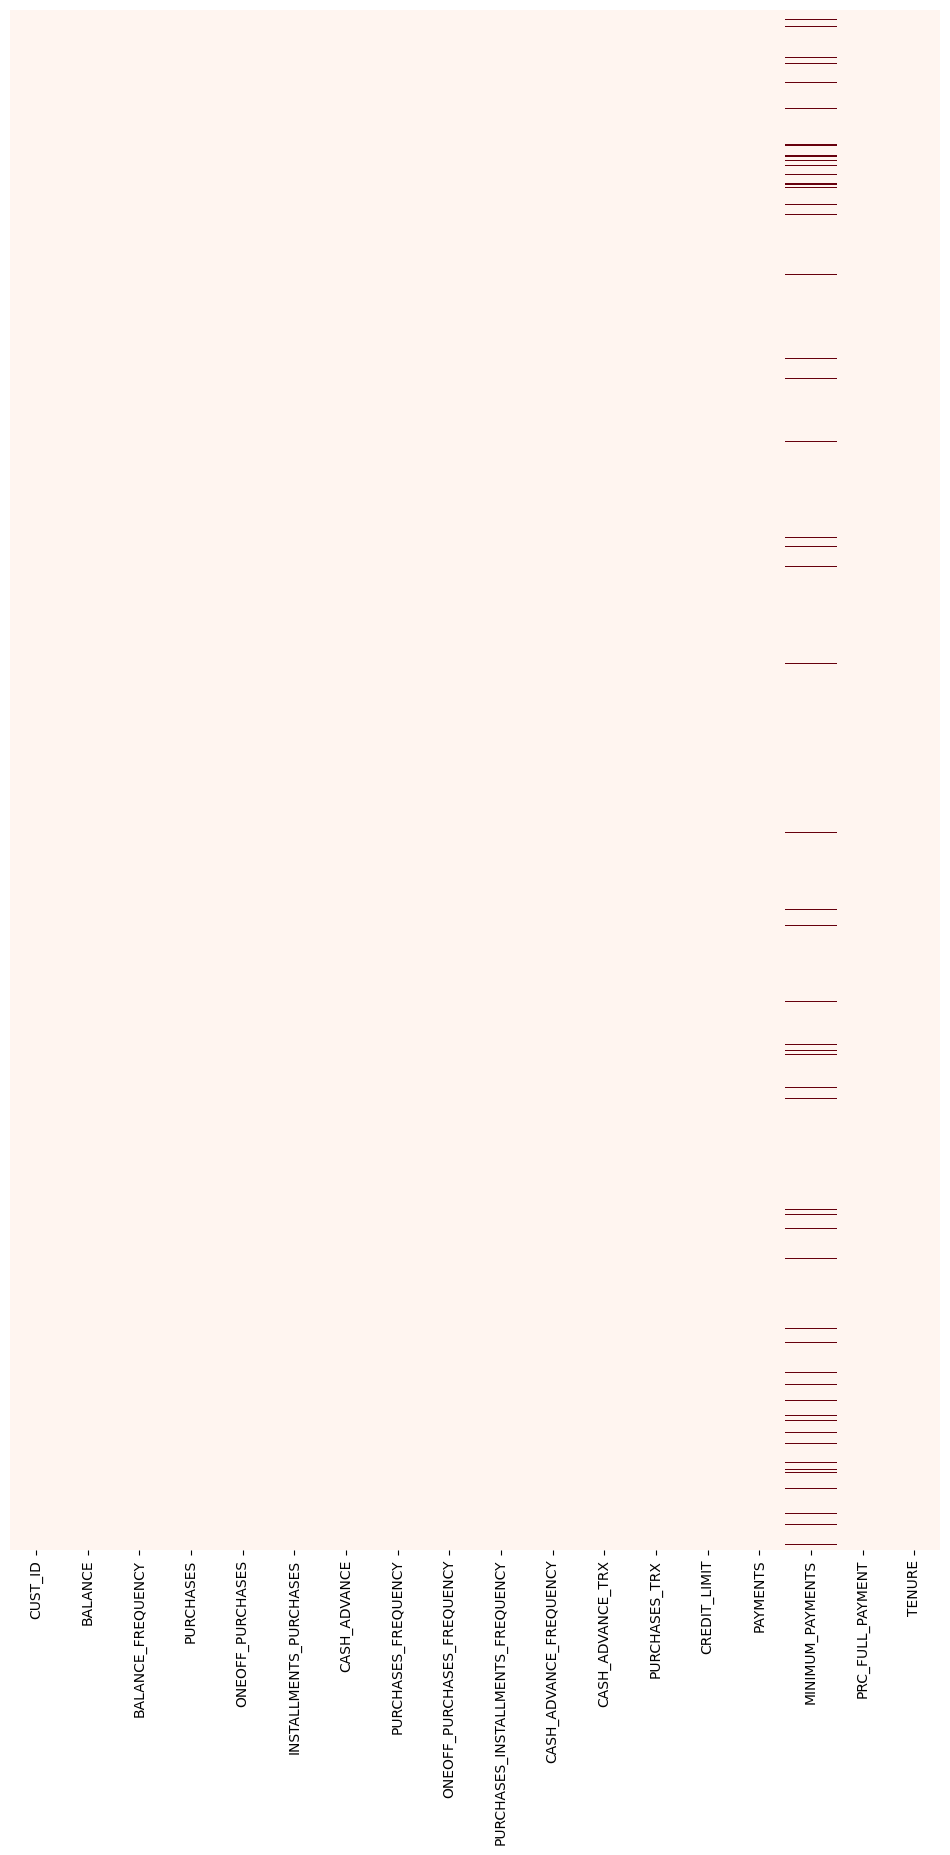

In [ ]:
# Comprobemos a ver si tenemos datos faltantes (forma alternativa de visualizar los faltantes)
plt.figure(figsize=(12,20))
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap = "Reds")
plt.show()

In [ ]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT'; AUNQUE HAY DIFERENTE FORMAS DE RELLENAR, EN ESTE CASO ES RAZONABLE HACERLO ASI
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
# Vamos a rellenar los datos faltantes en la columna CREDIT_LIMIT con el promedio del campo 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [ ]:
#comprobar si se han rellenado
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos
creditcard_df.duplicated().sum()#si hubiera duplicado habria que eliminarla para este caso porque no podemos tener un cliente duplicado a menos que tenga 2 tarjetas con el mismo identificador

0

In [ ]:
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada
creditcard_df.drop("CUST_ID", axis = 1, inplace=True)

In [ ]:
#dataet ya limpio
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Hacer graficos de densidad estimada kernel junto con sus histogramas de frecuencias

In [ ]:
n=len(creditcard_df.columns)

In [ ]:
n

17

<ipython-input-11-86839aef09b0>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-11-86839aef09b0>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[c

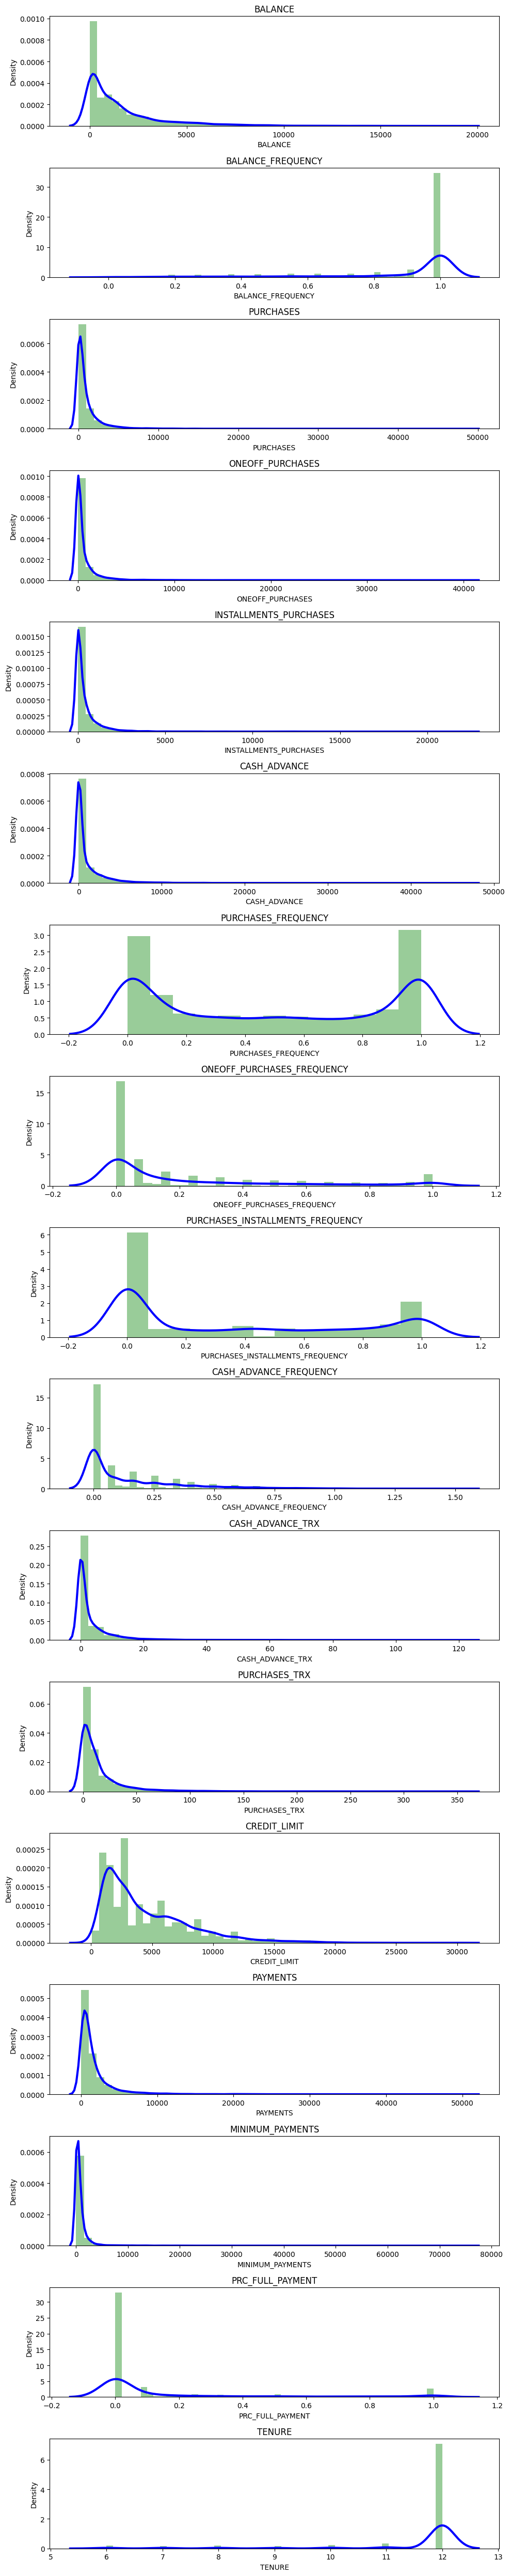

In [ ]:
#Densidades kernel estimadas de nuestras variables

# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua.
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua.

plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)#subplots de 17 filas y una columna que itere como i+1
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})#combinar los dos graficos en un solo espacio; histograma y densidad
    plt.title(creditcard_df.columns[i])

plt.tight_layout()#para que ocupe todo el espacio disponible

Analisis breve de los graficos:
- Balance: la gran mayoria de clientes casi no tiene dinero en la tarjeta y tienen menos de 5000 dolares en la tarjeta.
- balance frequency: la gran mayoria actializa su saldo frecuentemente (=1)
- purchases frequency (frecuencia con la que compra la gente): tenemos una bimodal; hay gente que no compra casi nunca(=0) y otra que compra seguido (=1)
- trnure: casi todos los usuarios tienen 12 años con la tarjeta



In [ ]:
#tabla de correlaciones sin calor
correlations=creditcard_df.corr()
correlations

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


<Axes: >

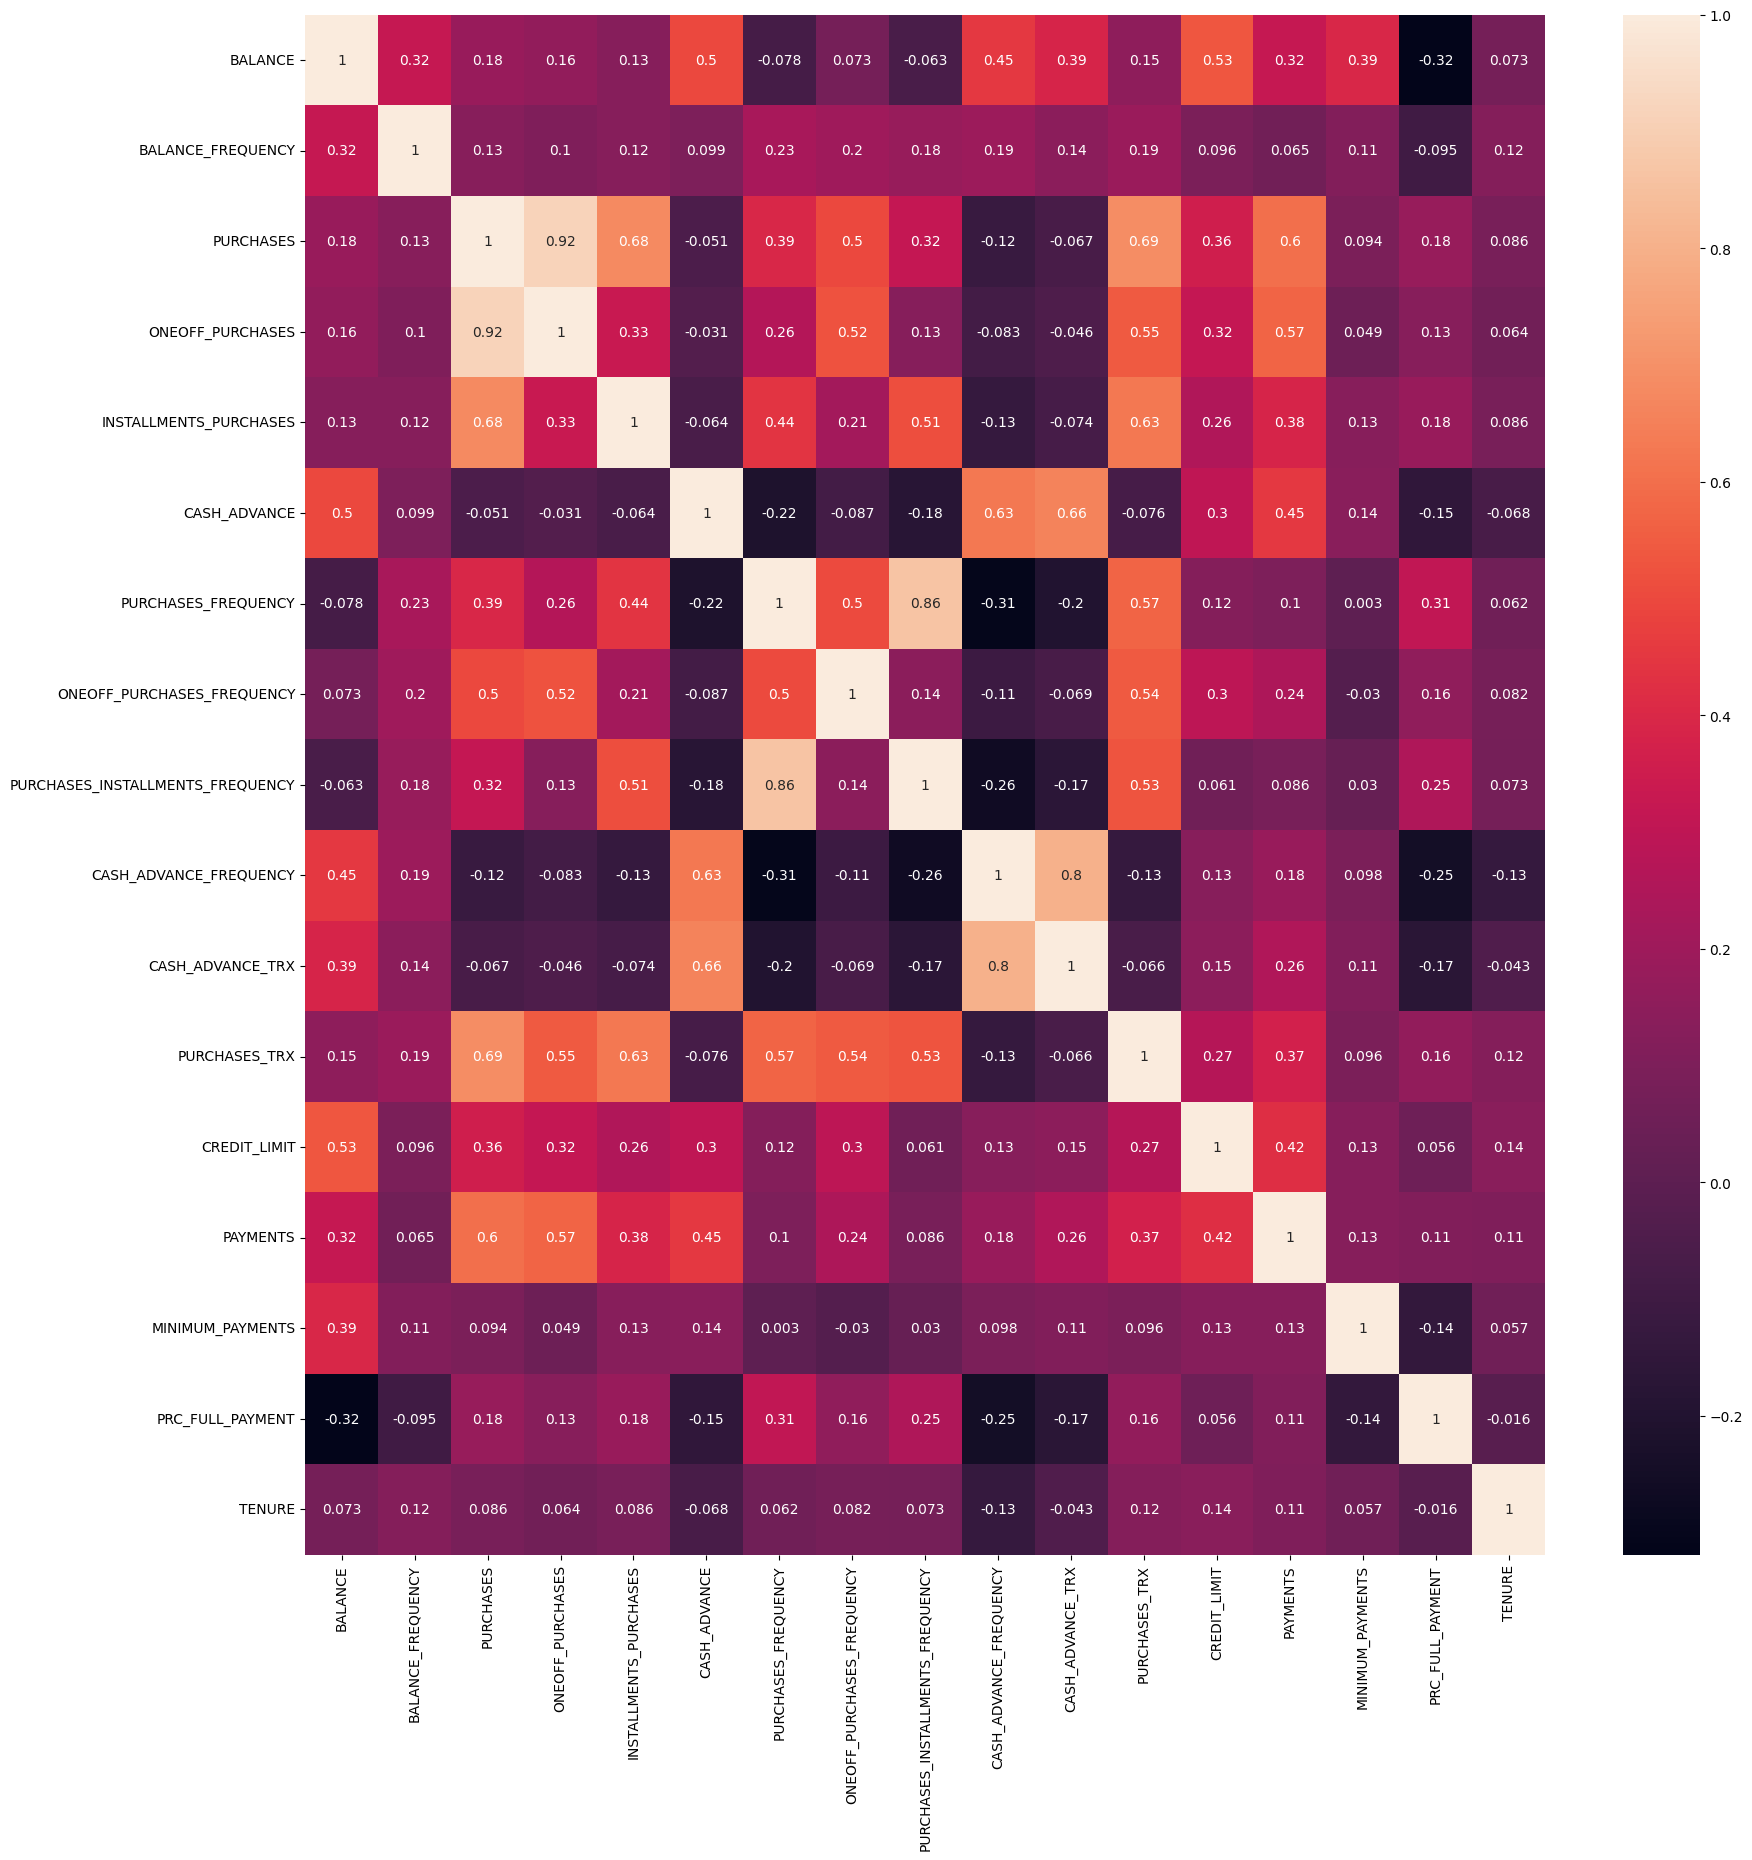

In [ ]:
#mapa de calor de correlaciones
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)
# 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments.
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'


# #5 SELECCIONAR LOS MODELOS ADECUADOS

Crearemos 3 modelos con el fin de comparar sus resultados y ver cuál es el mejor modelo clasificando a los empleados. La seleccion no es al azar, se escogen modelos que se "adapten a la data".
En este caso necesitamos segmentar la data; formar clusters. No tenemos conjunto de testing; es un modelo no supervisado.

Podemos aplicar, en principio:

- K-means: Dividir la data en grupos aproximadamente homogéneos y crear grupos(clusters)

- Análisis de componentes principales: Dadas m variables independientes, ACP extrae p<=m varables independientes del dataset (reduce la dimension del problema); es una tecnica de reduccion de la dimension. Y finalmente reduciremos la dimension con la tecnica de PCA

- Autoencoders

Estos dos son algoritmos no supervisados

Sabemos que para aplicar el algoritmo de k-mans, es necesario saber primero el numero optimo de clusters; aplicamos el metodo del codo.

# #6: ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DEL CODO

In [ ]:
# Empecemos por escalar primero el dataset, pues los rangos de valores de la variable multivariante independiente son diferentes en rango; por la heterogeneidad de los datos
#y en particular para este algoritmo es importante, pues k-means se basa en calcular dintancias entre centros de masa
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled#es obligatorio o casi obligatorio escalar las variables siempre que tengamos un modelo que se base en calcular distancias, pues sino unas dominarán sobre otras

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

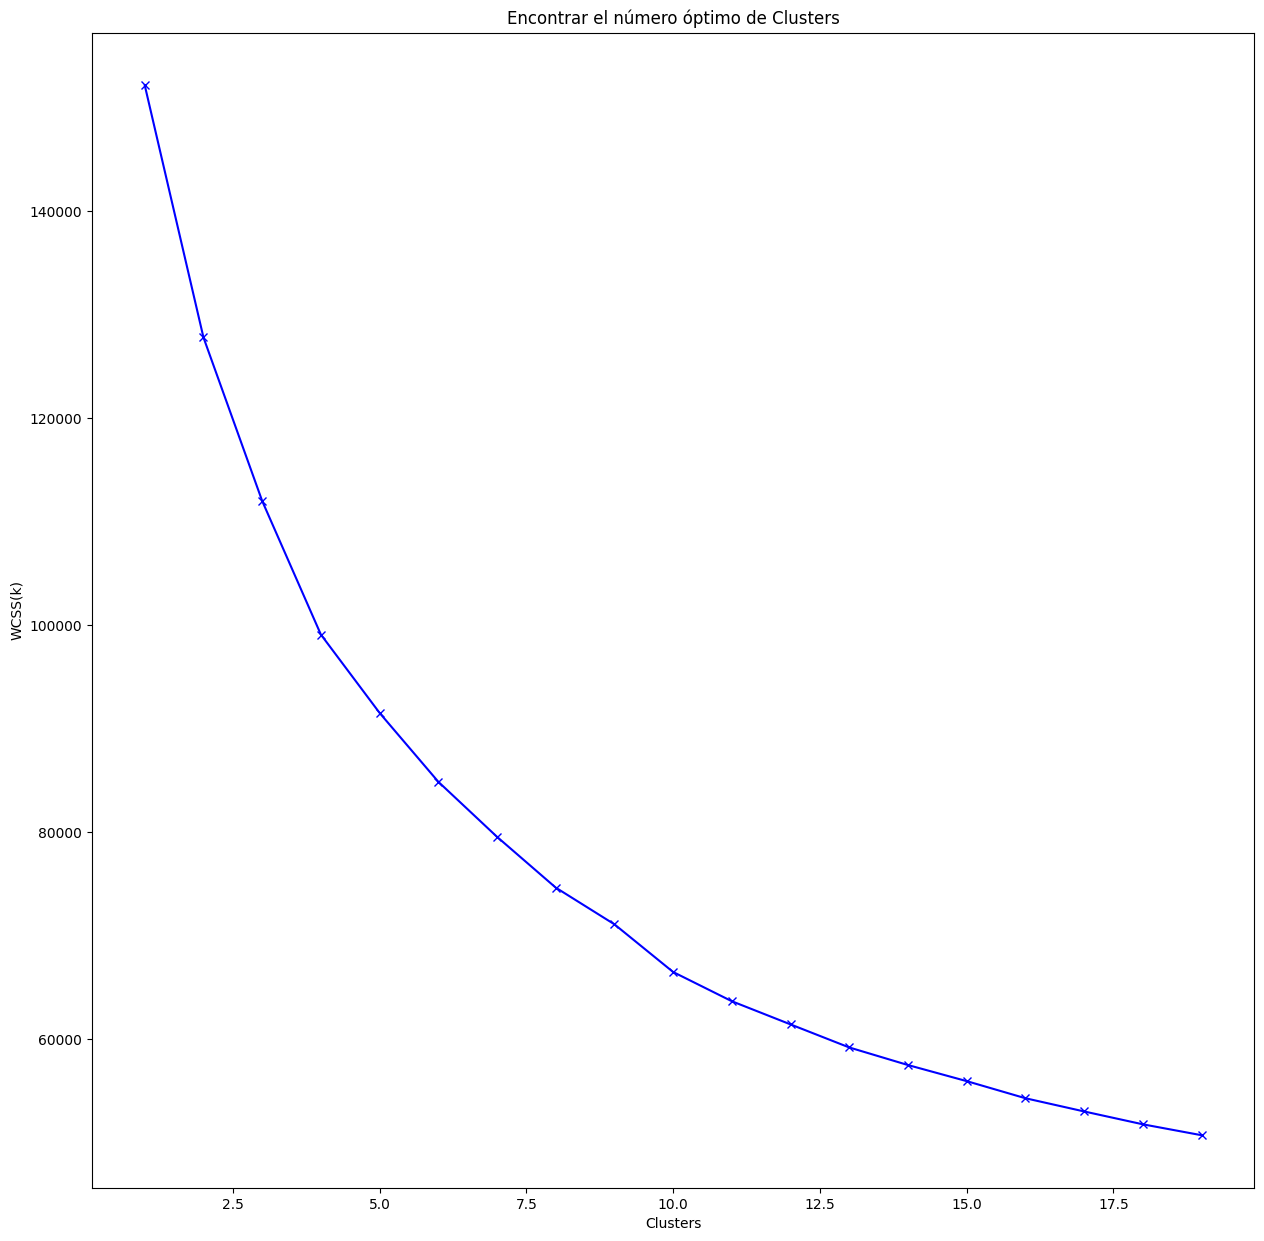

In [ ]:
#grafico de codo para el numero optimo de clusters
scores_1 = []#guardar las iteraciones

range_values = range(1, 20)#objeto iterable k de 0 a 19

for i in range_values:
    kmeans = KMeans(n_clusters = i)#para cada iteracion, su propio k-means
    kmeans.fit(creditcard_df_scaled)#ajustar los centros (aplica el algoritmo en este punto)
    scores_1.append(kmeans.inertia_) #WCSS = suma de los cuadrados intacraster (en python se llama inertia)

#crear grafico una vez terminado el ciclo for
plt.figure(figsize=(15,15))
plt.plot(range_values, scores_1, 'bx-')# graficar: blue, cruz en cada cluster y linea continua
plt.title("Encontrar el número óptimo de Clusters WCSS VS K")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()
# Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster.
# Elijamos pues un número de clusters igual a 8

Seleccionaremos k=8, pues en ese punto se ve una tendencia lineal mucho más ponunciada




NOTA:

Tenemos que escoger
- 2.- Cuando el cluster tiene un cambio brusco (cluster no. 4 en el grafico previo)
- 1.- Cuando, en un determinado cluster, todos los que le siguen se pueden ver como una recta aproximadamente (cluster 8); esto resulta util (y de hecho es el criterio cuando hay mas de un codo como en este caso) para mas de dos codos

# #7: APLICAR EL MÉTODO DE K-MEANS

In [ ]:
#creamos el algoritmo con el no. opimo de clusters seleccionados
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_
labels#observamos a qué cluster pertenece cada observacion del conjunto de datos

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 2, 4, ..., 6, 6, 6], dtype=int32)

In [ ]:
#tenemos 8 baricentros (del 0 al 7) de tamaño 17
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
#cada fila representa un baricentro
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers
#por ejemplo, el cluster no. 2 de la columna PURCHASES tiene su baricentro en -0.203466

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.701253,-2.141560,-0.311047,-0.235565,-0.302578,-0.322150,-0.555955,-0.443021,-0.440183,-0.521105,-0.376272,-0.419604,-0.177998,-0.202449,-0.256774,0.280448,0.199473
1,-0.366541,0.333613,-0.038954,-0.244358,0.356637,-0.363772,0.988918,-0.386940,1.204105,-0.475444,-0.361371,0.186089,-0.261402,-0.218295,-0.046278,0.313708,0.257637
2,1.694611,0.392461,-0.217178,-0.155693,-0.227545,2.031083,-0.475897,-0.211906,-0.413208,1.929483,1.946123,-0.265777,1.035157,0.829482,0.514993,-0.390406,0.069264
3,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
4,-0.162601,0.392179,0.464655,0.606993,-0.016632,-0.332621,0.942818,1.878030,0.090361,-0.406452,-0.322632,0.529433,0.384113,0.094331,-0.162193,0.406784,0.261183
5,0.922183,0.467535,2.256660,1.722274,2.171760,-0.195314,1.160307,1.552162,1.245501,-0.313553,-0.211258,2.785144,1.225536,1.285330,0.567968,0.290267,0.333992
6,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
7,0.020495,0.404143,-0.362337,-0.247461,-0.401999,-0.086997,-0.868981,-0.411271,-0.759983,0.115278,-0.020606,-0.487523,-0.305173,-0.248749,-0.003158,-0.456970,0.272397


Como escalamos las variables para aplicar el modelos, es momento de hacer una transformacion inversa a los baricentros, recuperar la informacion y poder entenderla de forma real:

In [ ]:
# aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[creditcard_df.columns])
cluster_centers

#Nombramos los clusters

# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo
#
#   ..................ASI PODEMOS DEFINIR LA CUALIDADES DE LOS 8 CLUSTERS...............
#
#


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,774.679230,0.955383,918.288312,208.304813,710.423105,205.994687,0.883763,0.098437,0.829670,0.039643,0.774606,18.929134,3491.766832,1089.590057,608.075950,0.245647,11.854331
1,1858.866188,0.979170,3038.082062,2094.498287,944.059588,334.942871,0.930190,0.762514,0.578666,0.053513,1.083267,44.748612,7093.756759,2882.335583,746.402836,0.288488,11.928628
2,4974.642883,0.969989,568.496332,349.183995,219.427088,5192.404909,0.308748,0.148201,0.204119,0.522340,16.489842,8.841986,8167.104453,4173.700863,1724.354197,0.040586,11.609481
3,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
4,4425.362379,0.974886,16338.028250,11188.905375,5149.122875,1012.529590,0.924792,0.774489,0.774489,0.077083,2.512500,133.687500,12430.000000,16098.700812,2516.595215,0.406617,11.962500
5,103.540821,0.371392,347.092201,209.719739,137.622715,301.615215,0.270648,0.074517,0.189152,0.030663,0.677909,4.353288,3868.203579,1149.392761,264.100759,0.240202,11.787521
6,3928.125451,0.988430,843.379636,99.862000,743.517636,889.924775,0.461708,0.035399,0.430992,0.104545,2.927273,16.672727,4145.454545,1510.251238,22855.761083,0.001515,11.909091
7,1573.433204,0.972466,270.925771,221.444155,49.657044,754.930676,0.165787,0.103032,0.065131,0.151417,2.951790,3.164835,3398.144866,1011.061034,716.685055,0.021374,11.880893


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max()

7

In [ ]:
labels.min()

0

In [ ]:
#llega un nuevo cliente y queremos saber en qué cluster acomodarlo (de los 8 que tenemos; 0,1,2,3,4,5,6,7)
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 7, 6, ..., 0, 0, 0], dtype=int32)

Por ejemplo, si ingresa un nuevo dato con caracteristicas X, se "acomodará" en el cluster cuya distancia al baricentro sea minima

In [ ]:
# Concatenamos las etiquetas de los clusters con el dataset original para saber a qué cluster pertenece cada observacion (cliente) en funcion de sus caracteristicas
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


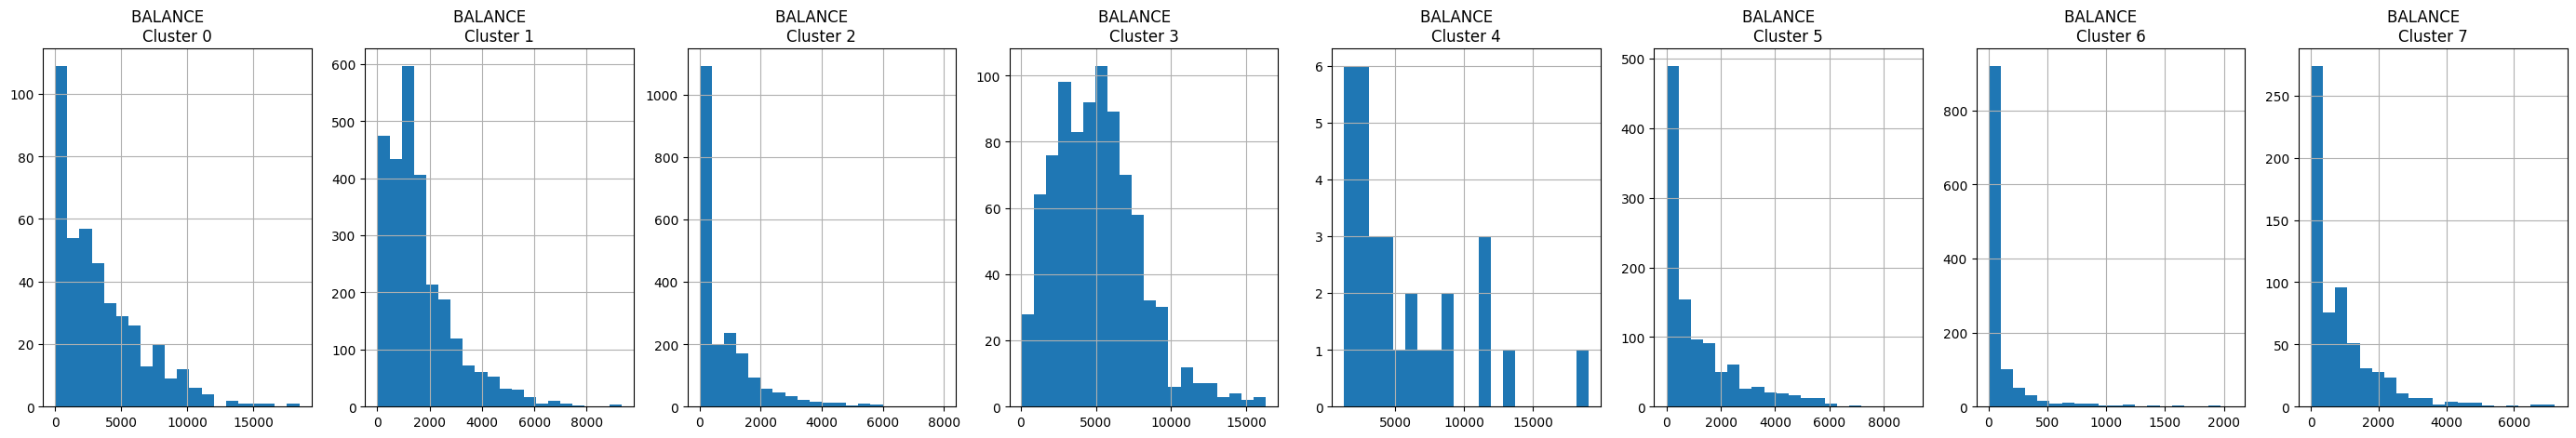

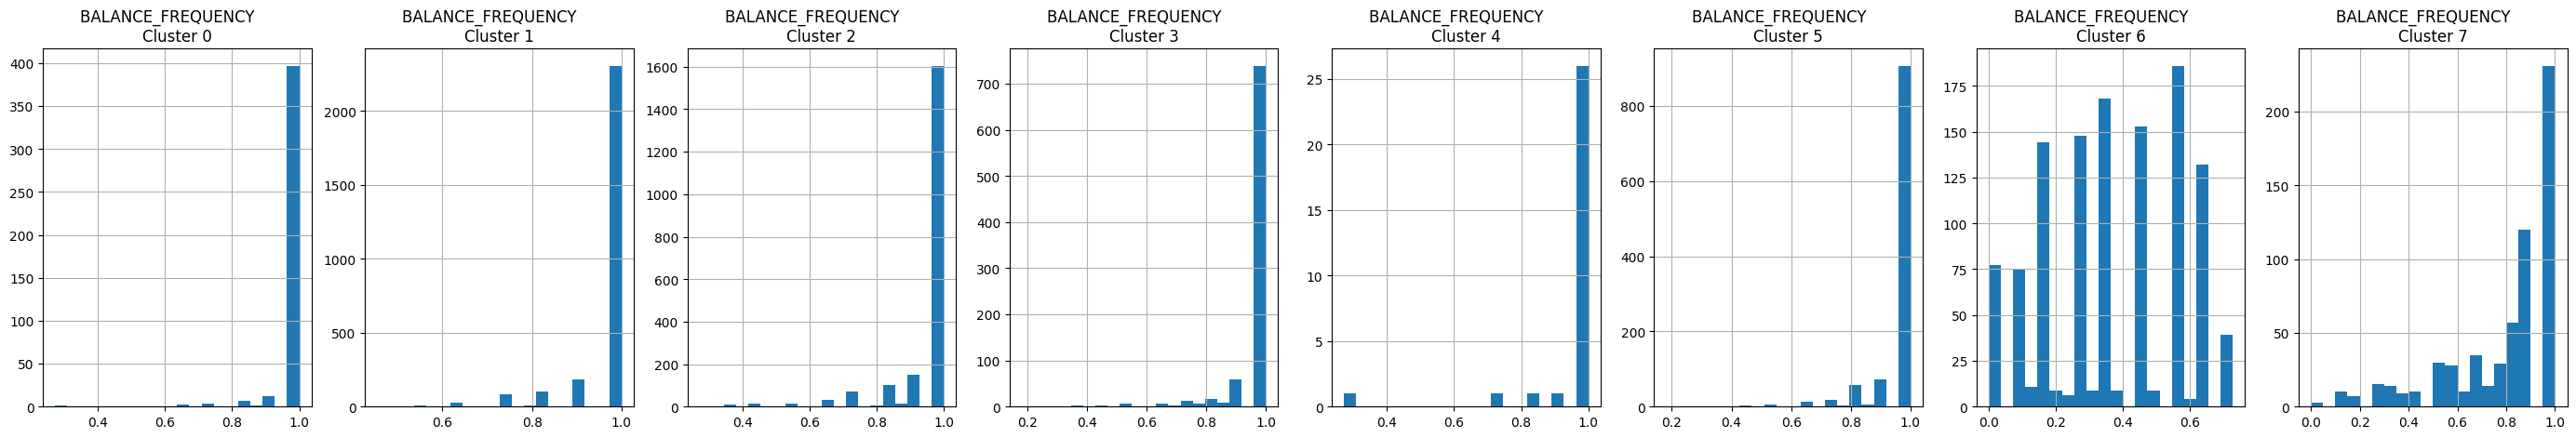

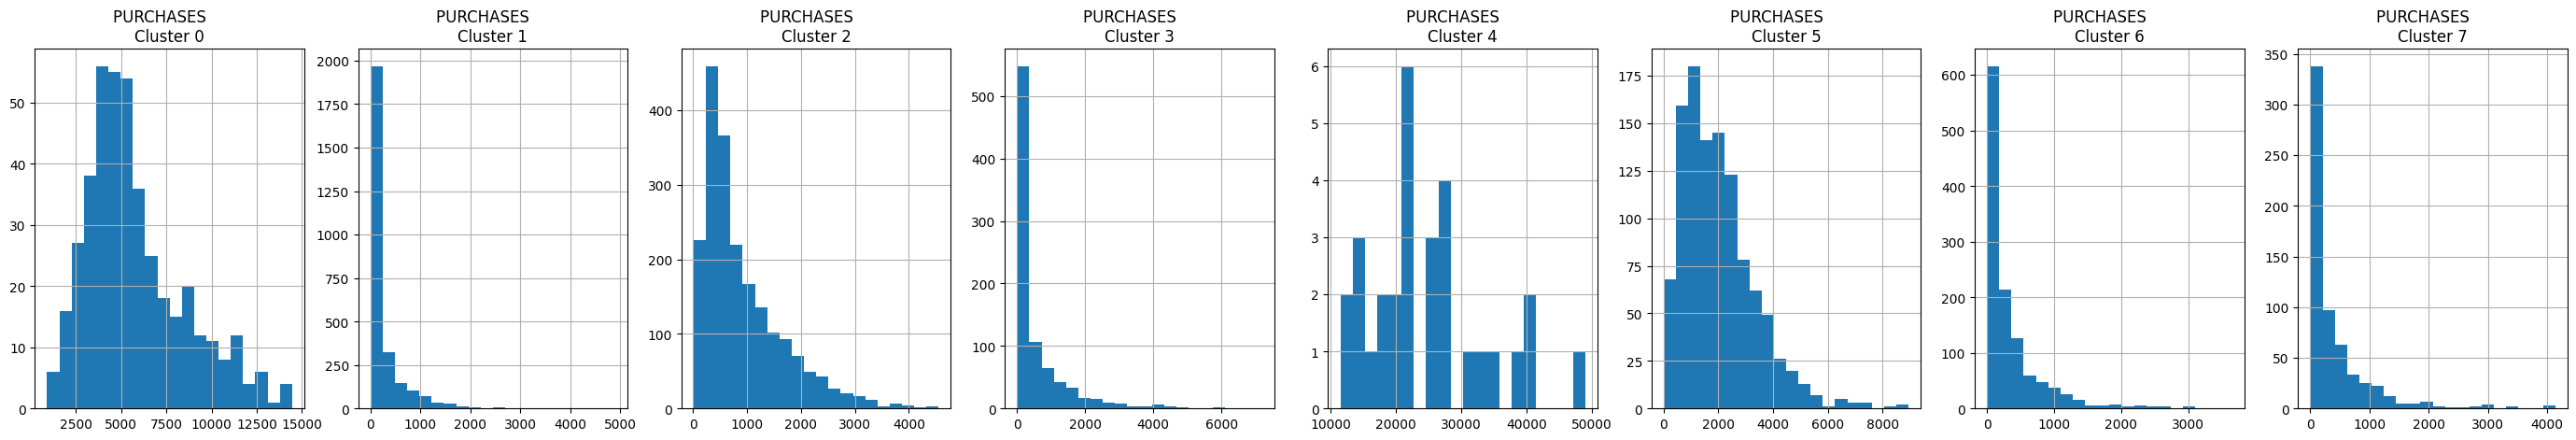

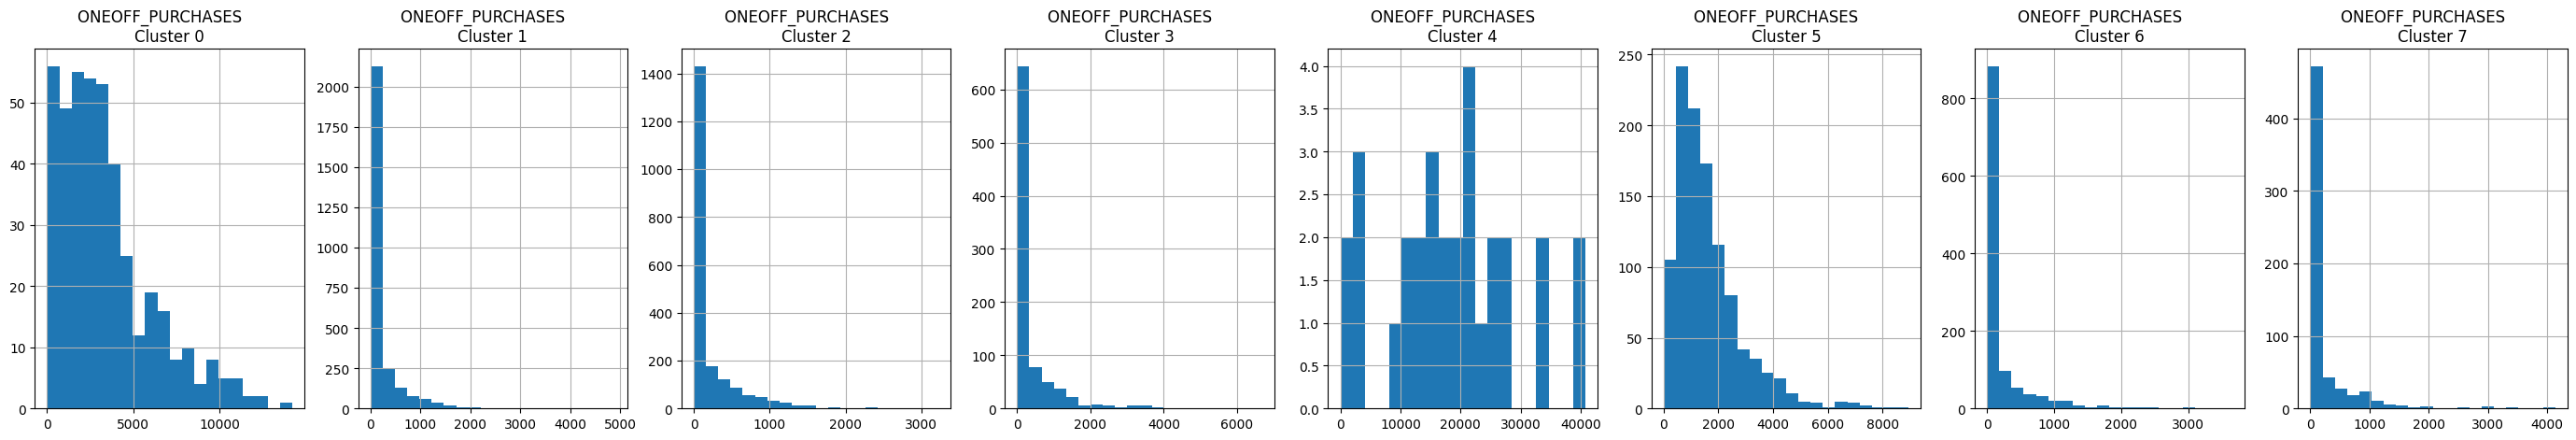

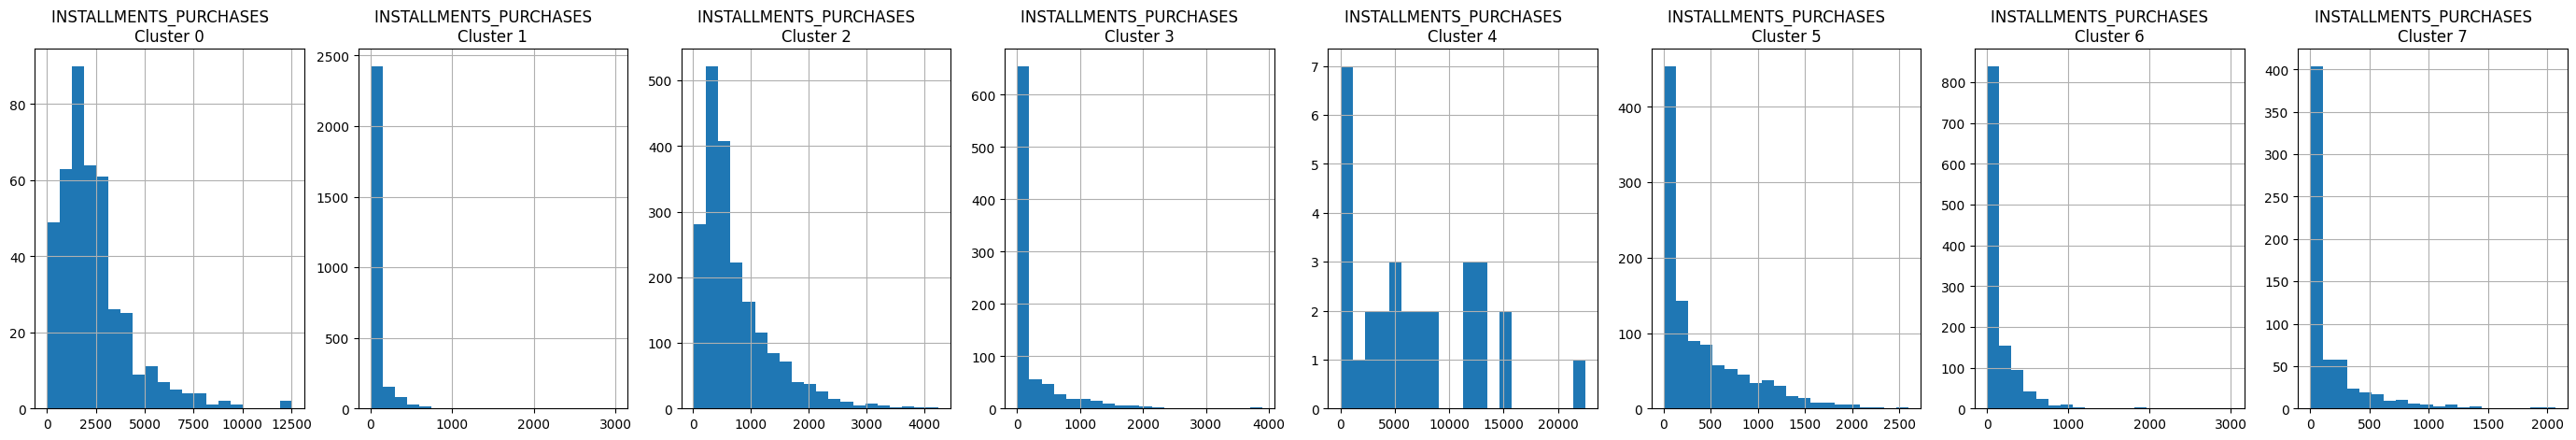

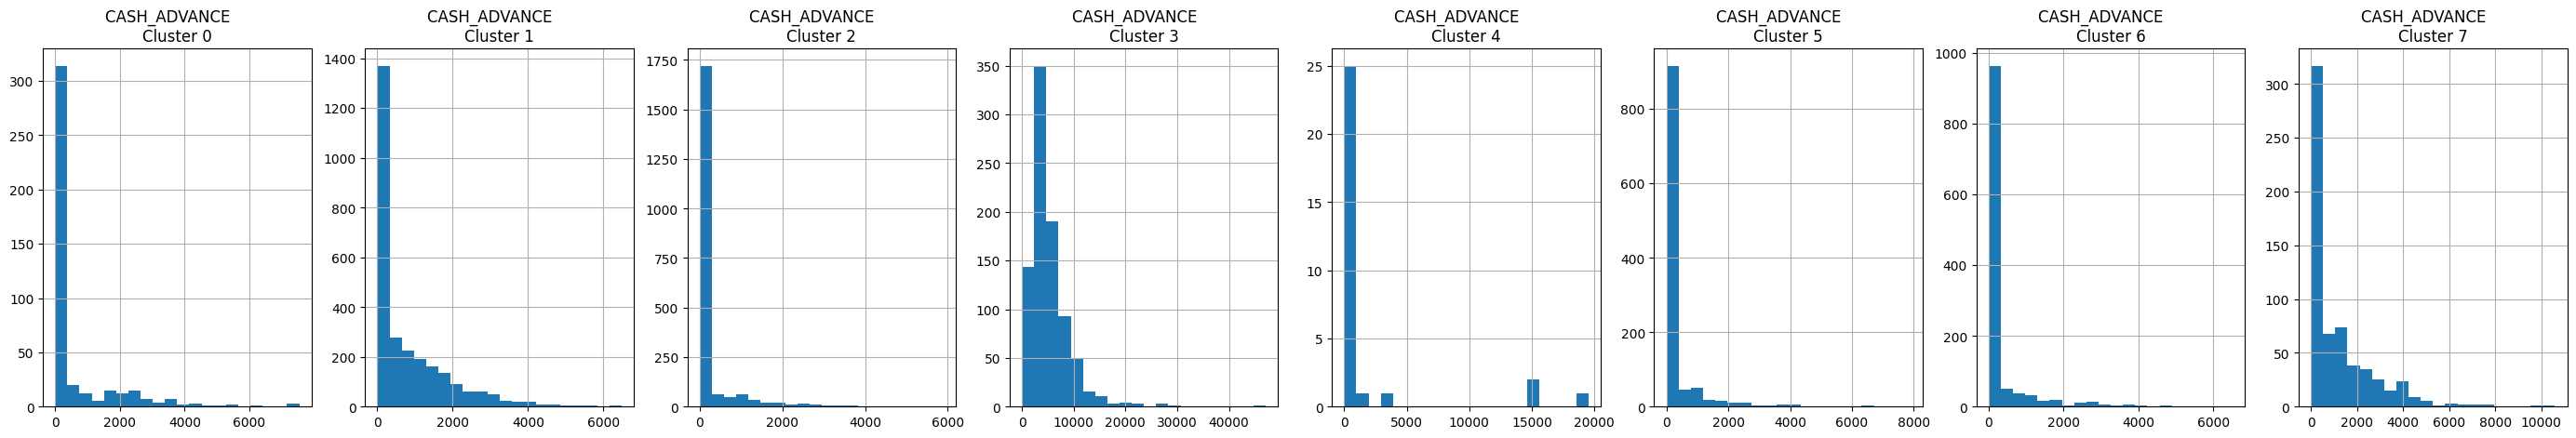

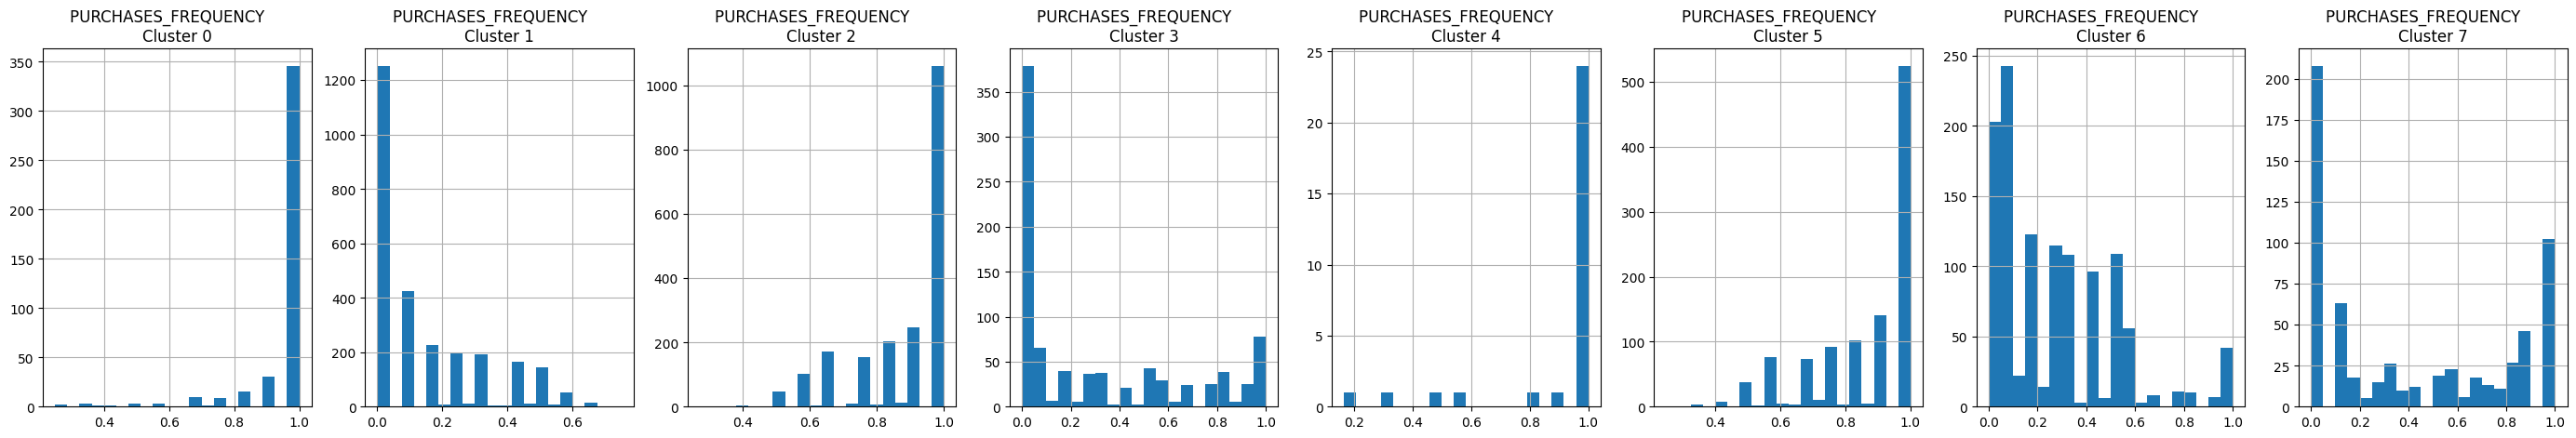

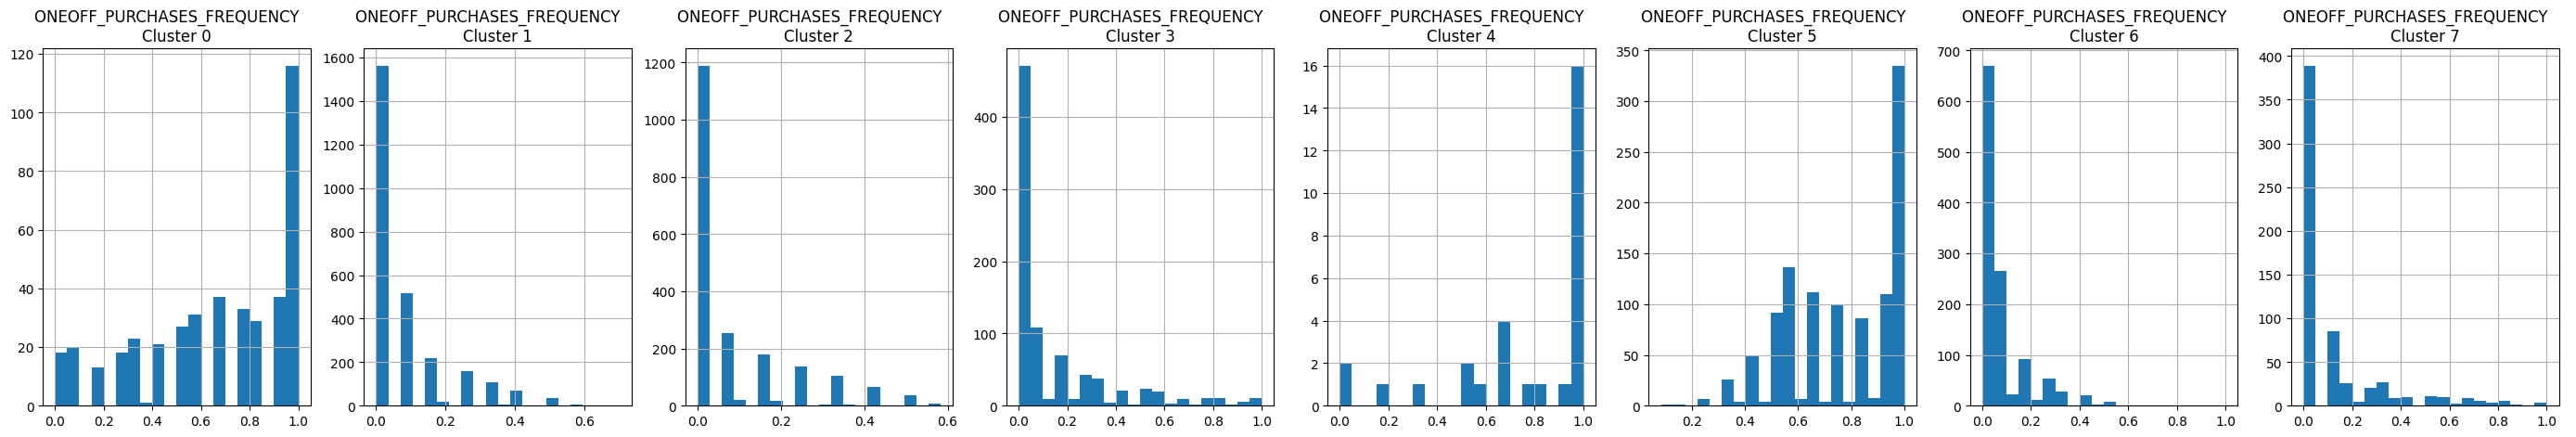

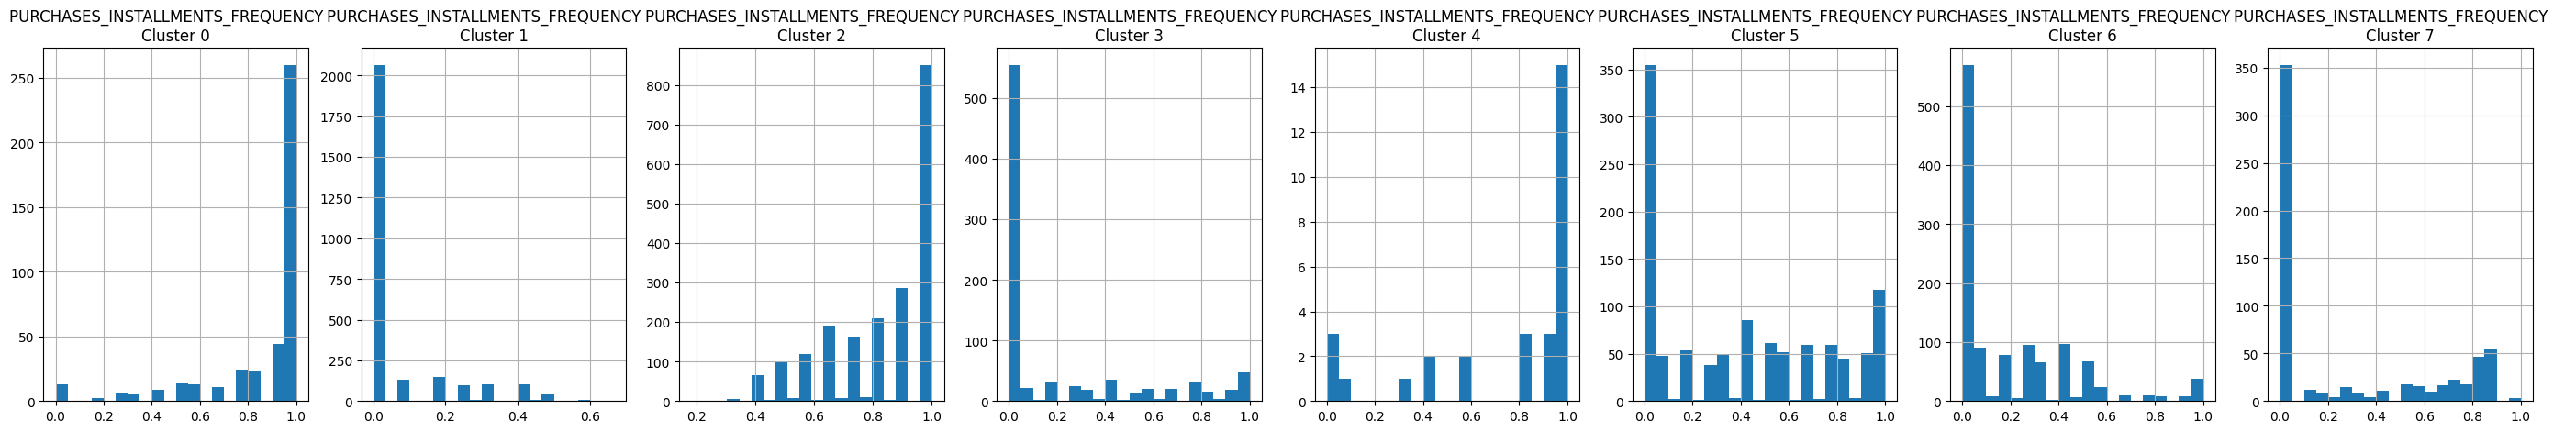

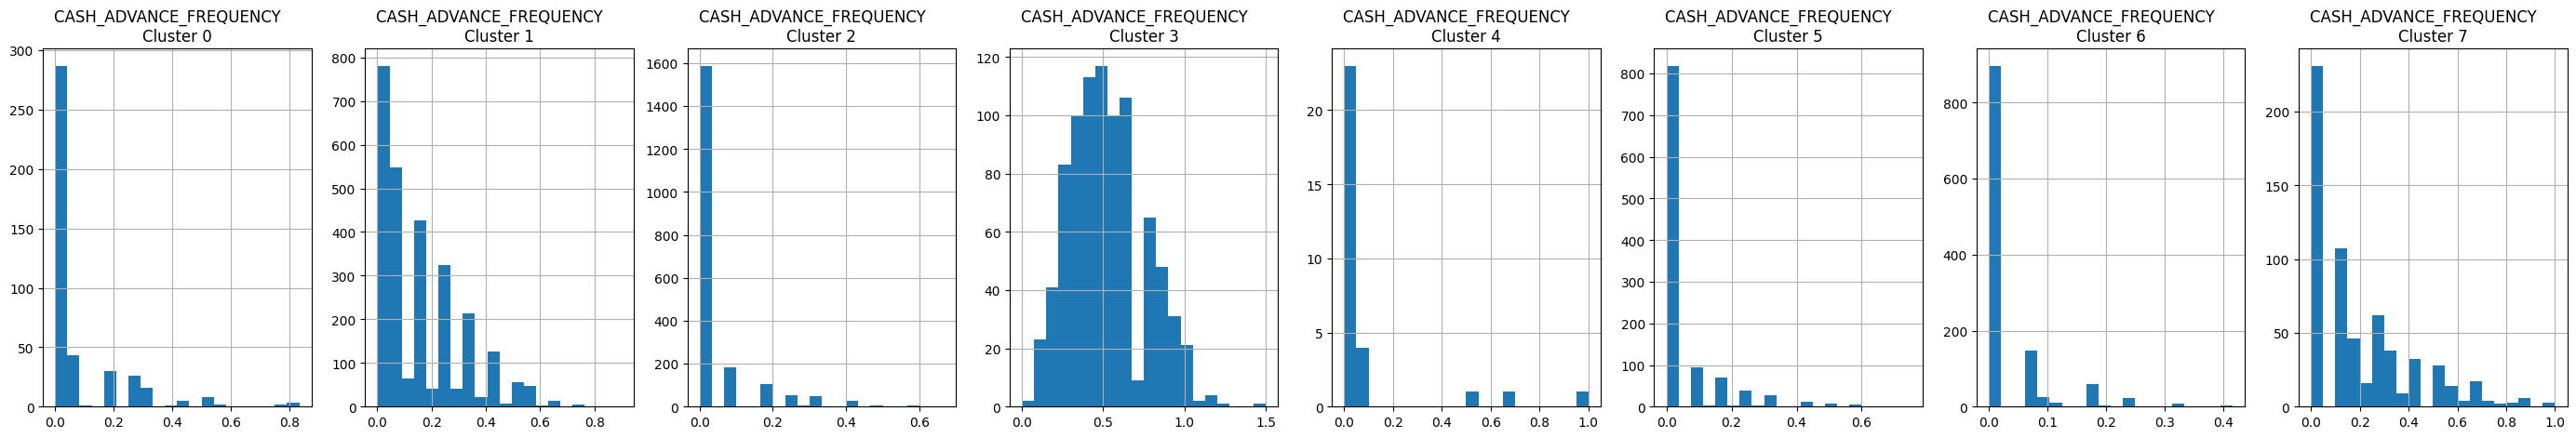

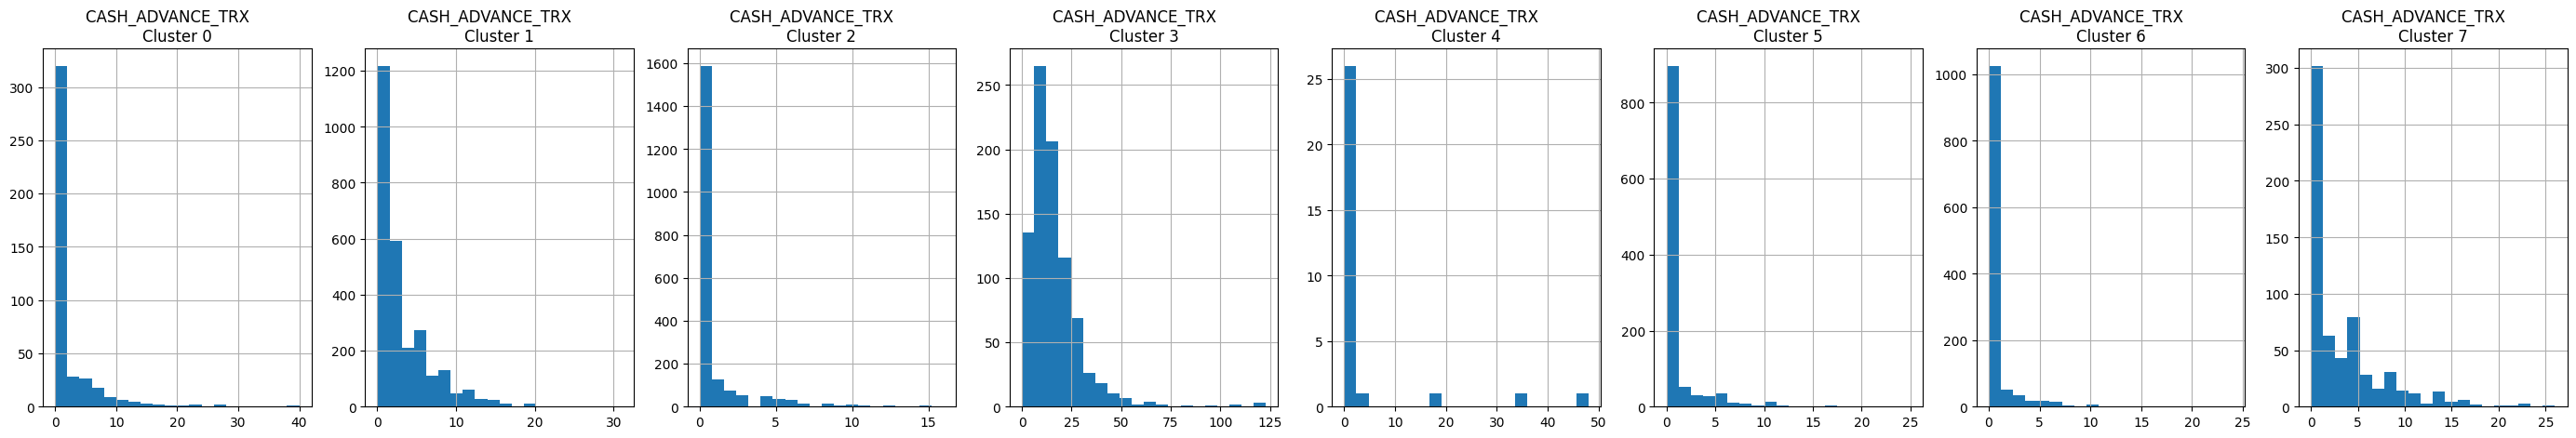

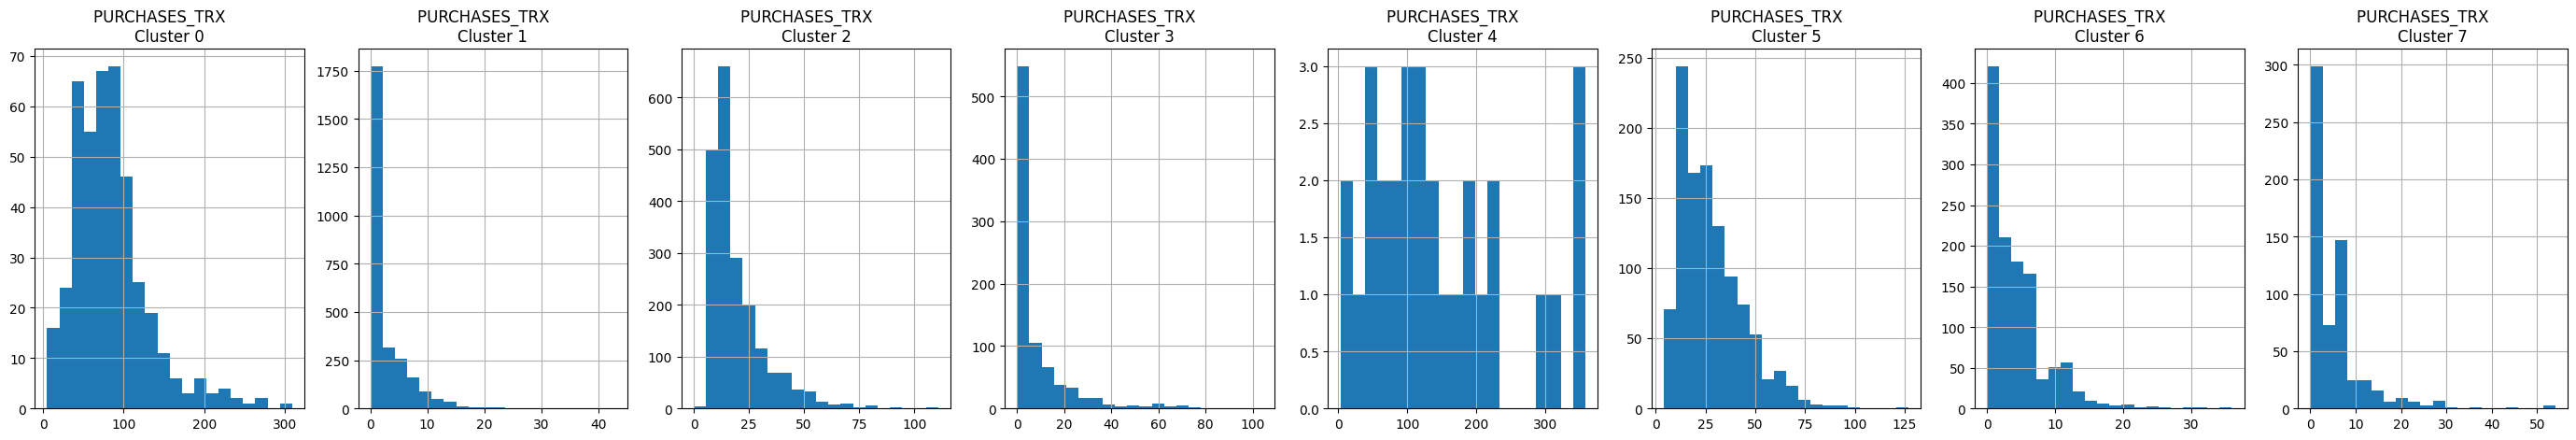

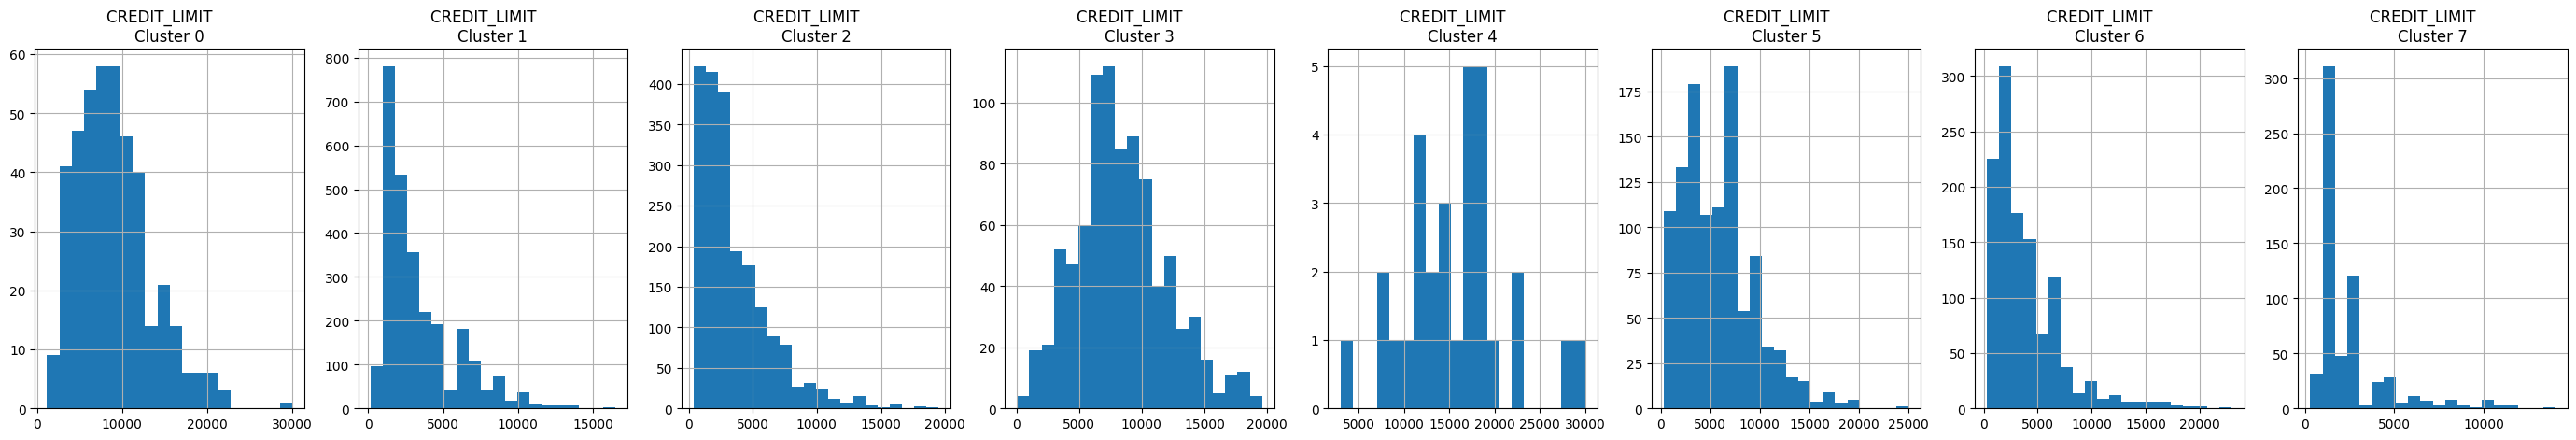

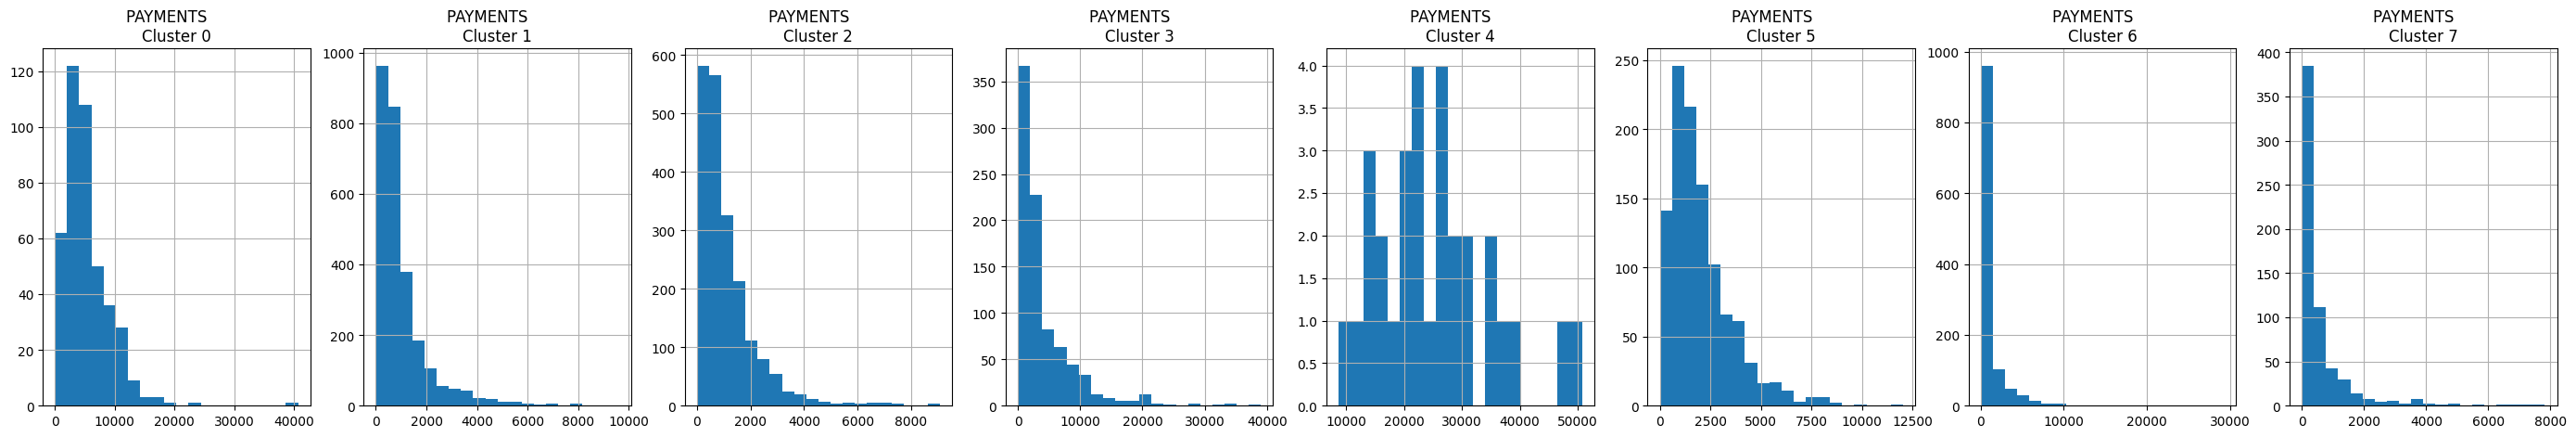

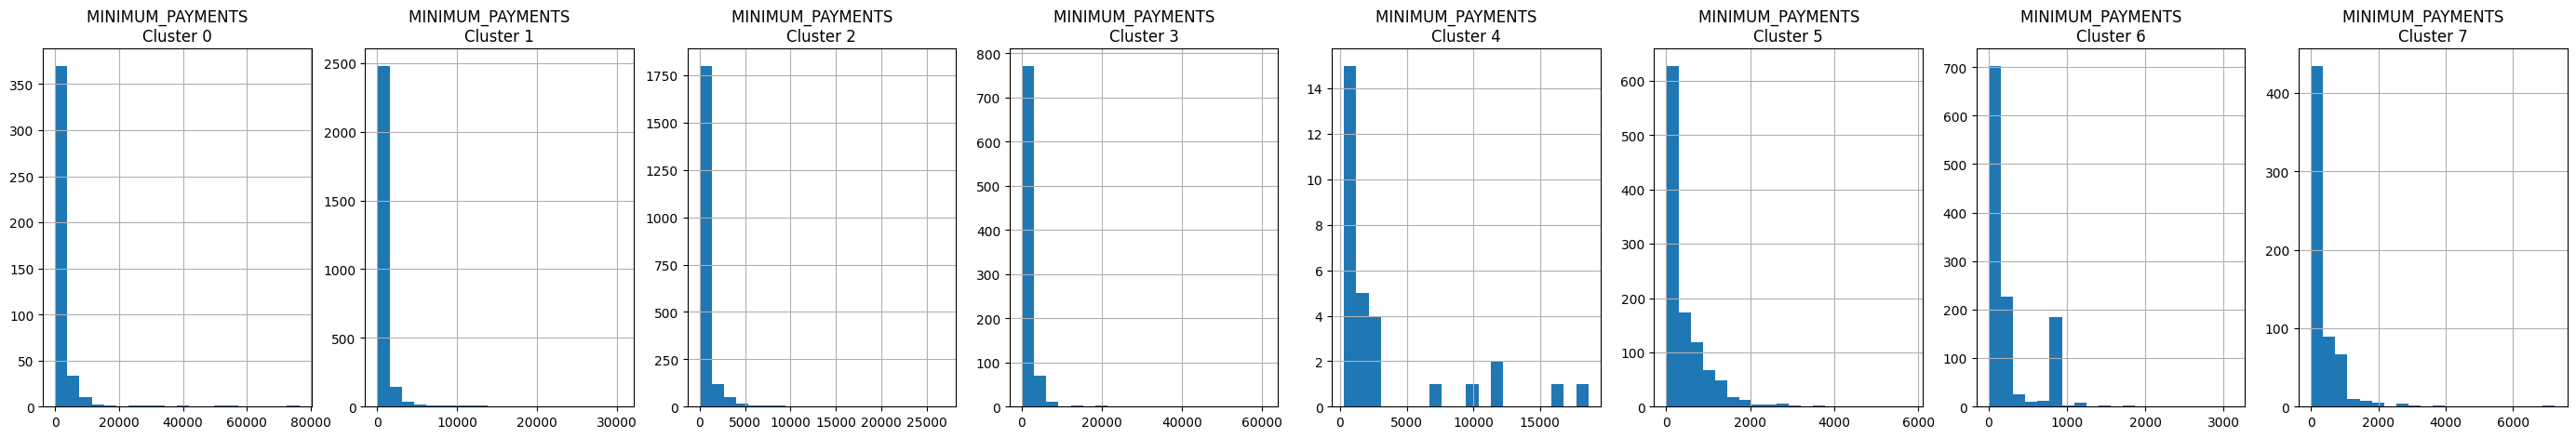

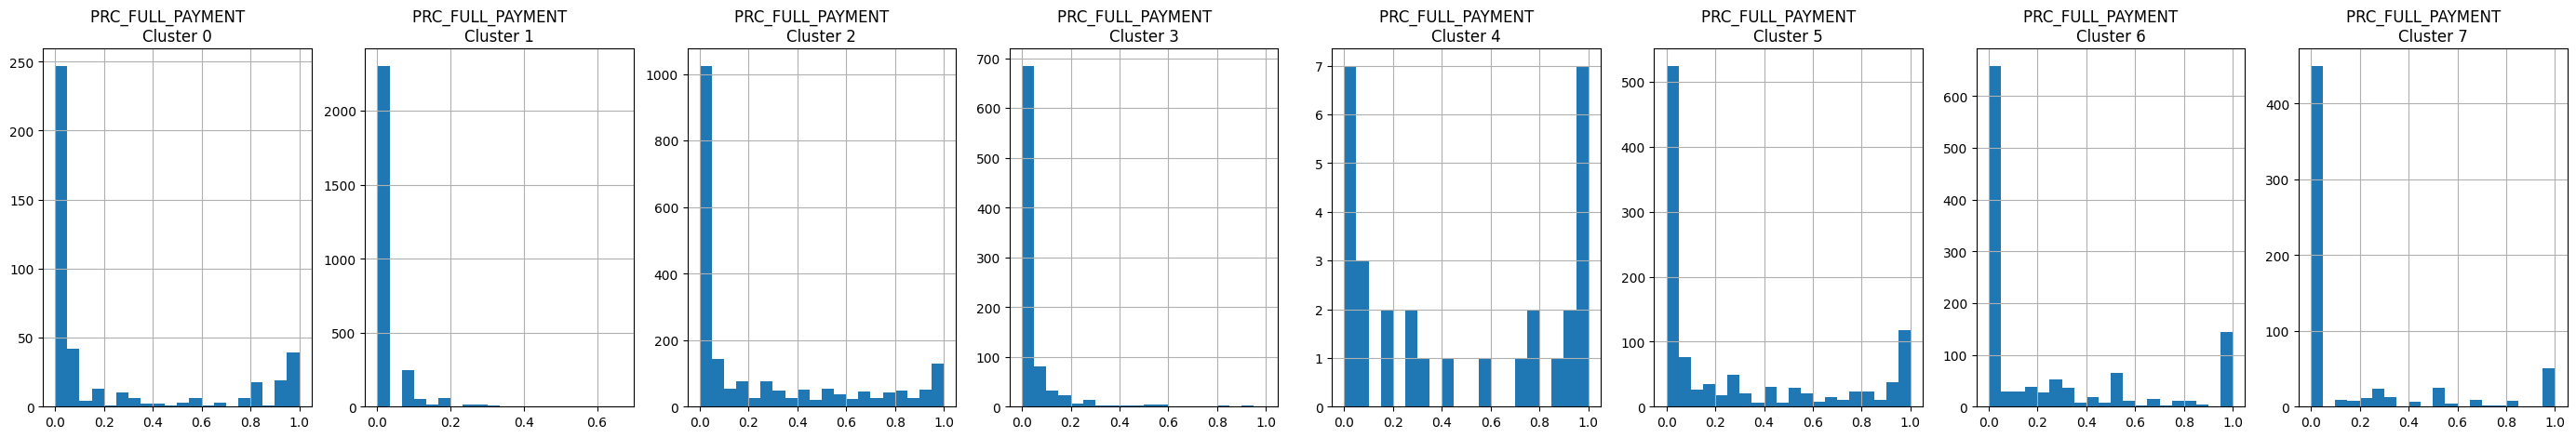

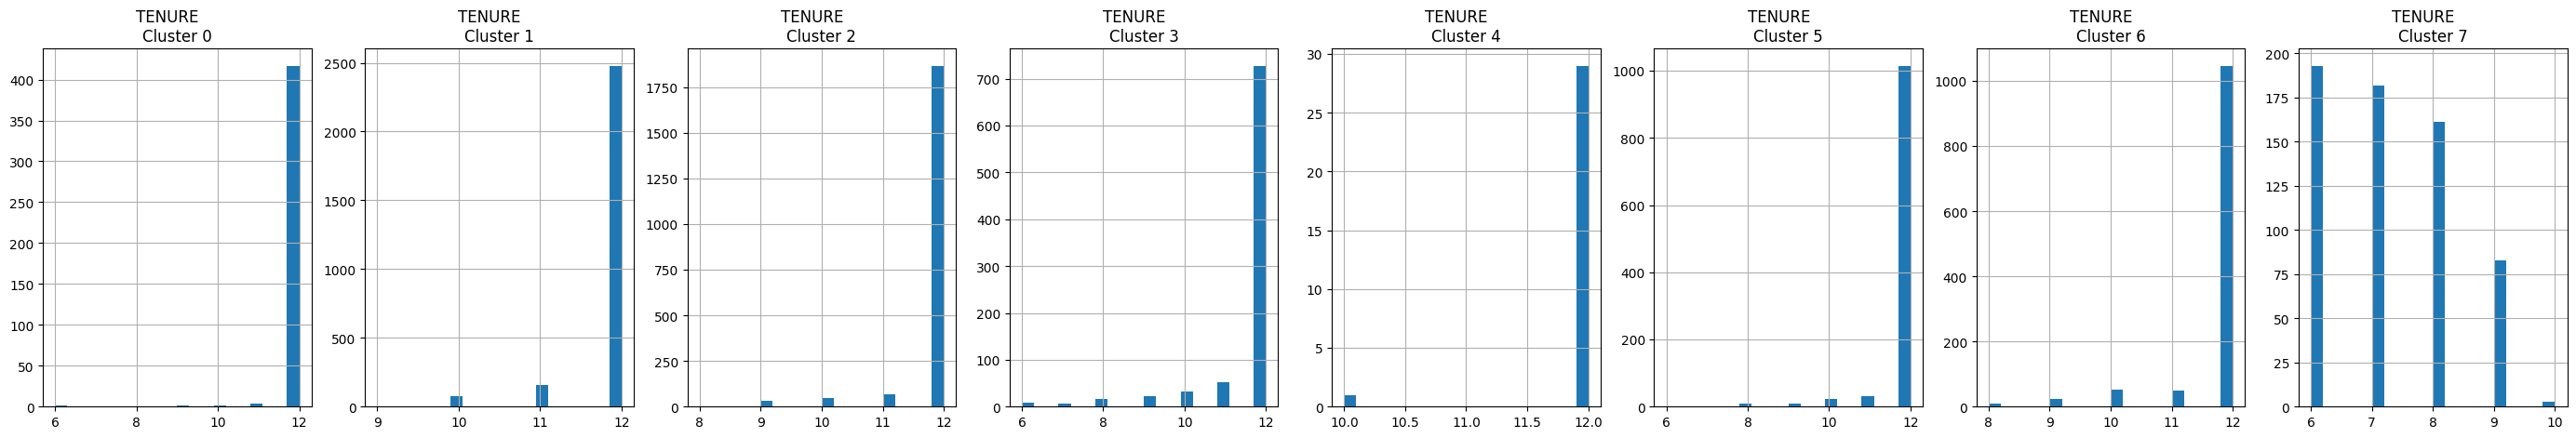

In [ ]:
# Visualizamos histogramas para cada cluster
for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()

Como vemos, la visualizacion de tantos histogramas es muy dificil, lo que haremos es reducir la dimension con el método de componentes principales para obtener una mejor visualizacion

# 8: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS

Las componentes principales son combinaciones lineales de todas las variables con la particularidad de que extraen o mantienen la misma informacion, o al menos eso intentan. Generalmente suelen ser dos componentes principales, pues éstas sí se pueden graficar (pero se puede reducir a cualquier numero de dimensiones). Estas dos variables que quedan despues del proceso de reduccion de la dimension son incorreladas e independientes una de la otra.

Este proceso de reduccion de la dimension, intenta explicar la variabilidad de los datos con la minima cantidad de variables posibles.

- Este metodo funciona muy bien cuando tenemos variables originales de nuestro dataset que sí están correlacionadas

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Obtenemos las componentes principales
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp#COMPONENTES PRINCIPALES

array([[-1.6822182 , -1.07645514],
       [-1.13828292,  2.50644457],
       [ 0.96967803, -0.38350464],
       ...,
       [-0.92620502, -1.81078049],
       [-2.33654999, -0.65796971],
       [-0.55642375, -0.40046541]])

In [ ]:
# Creamos un dataframe con las dos componentes
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()#Estas dos varables son una especie d variables resumen de todas las demas o bien, son una proyeccion del hiperespacio a un espacio de 2 dimensiones en R^2

,pca1,pca2
0,-1.682218,-1.076455
1,-1.138283,2.506445
2,0.969678,-0.383505
3,-0.873629,0.043170
4,-1.599431,-0.688586


In [ ]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales para indicar a qué cluster pertenece cada usuario
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682218,-1.076455,7
1,-1.138283,2.506445,2
2,0.969678,-0.383505,4
3,-0.873629,0.043170,7
4,-1.599431,-0.688586,7


In [ ]:
#contabilizamos el no. de datos en cada cluster
pca_df.value_counts('cluster')

cluster
7    2717
1    2016
0    1181
4    1104
2     860
6     622
5     420
3      30
dtype: int64

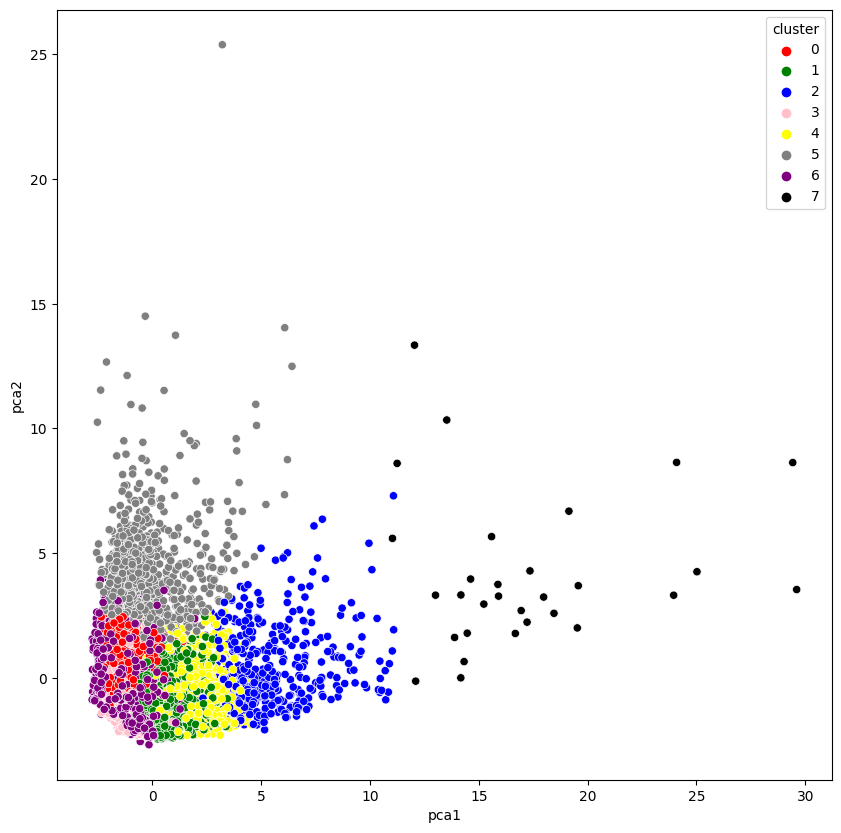

In [ ]:
#graficamos los clusteres
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df, palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()

Aqui podemos extraer concluisones

Fin primer modelo

# #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape = (17, ))

# Glorot normal inicializador (Xavier normal initializer) tomar muestras aleatorias de una distribución normal truncada

x = Dense(encoding_dim, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

(8950, 17)

In [ ]:
autoencoder.summary()

Epoch 1/25
70/70 [==============================] - 4s 57ms/step - loss: 0.4943
Epoch 2/25
70/70 [==============================] - 4s 57ms/step - loss: 0.2985
Epoch 3/25
70/70 [==============================] - 4s 56ms/step - loss: 0.2192
Epoch 4/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1879
Epoch 5/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1729
Epoch 6/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1595
Epoch 7/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1395
Epoch 8/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1300
Epoch 9/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1157
Epoch 10/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1067
Epoch 11/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0907
Epoch 12/25
70/70 [==============================] - 4s 56ms/step - loss: 0.0884
Epoch 13/25
70/70 [==================

In [ ]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs = 25, verbose = 1)

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)

In [ ]:
pred.shape

(8950, 10)

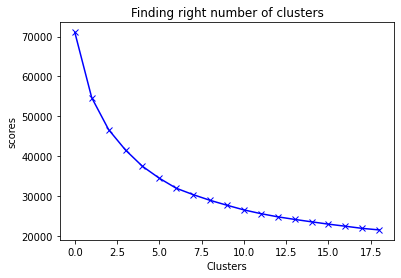

In [ ]:
scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

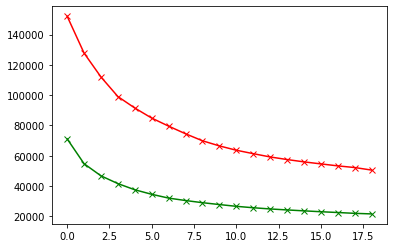

In [ ]:
plt.plot(range_values, scores_1, 'bx-', color = "r")
plt.plot(range_values, scores_2, 'bx-', color = "g")

In [ ]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

In [ ]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138299,2.506482
2,0.969680,-0.383501
3,-0.873630,0.043168
4,-1.599433,-0.688583


In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()